## U.S. Medical Insurance Costs

# Scope of the study:

### Objective: *Explore the dataset and identify impactful dependencies.*

#### Initial questions

Q1) [DONE] What is the distribution of each of the data columns (histograms/pie charts)?  
Q2) [DONE] How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges?  
Q3) [DONE] Which age group pays more charges on average?  
Q4) [DONE] Is smoking correlated with bmi or age?

Q5) [DONE] What is the average age in each of the regions?  
Q6) [DONE] Which region is most populous in this dataset?   
Q7) [DONE] What is the minimum and maximum number of children?  
Q8) What could be biased in the dataset?  

### Analysis:
Using pandas library sort, manipulate and visualize the dataset to reach objective.

### Dataset Content

   * age: age of primary beneficiary

   * sex: insurance contractor gender, female, male

   * bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

   * children: Number of children covered by health insurance / Number of dependents

   * smoker: Smoking

   * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

   * charges: Individual medical costs billed by health insurance


In [53]:
# Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# -------------------------------------------------------------------------------------------------------------
pd.options.mode.chained_assignment = None  # default='warn'

## Part 1: Exploring dataset

In [54]:
# Importing & exploring dataset 
df = pd.read_csv("insurance.csv")
df.describe().round(2)

,age,bmi,children,charges
count,1338.00,1338.00,1338.00,1338.00
mean,39.21,30.66,1.09,13270.42
std,14.05,6.10,1.21,12110.01
min,18.00,15.96,0.00,1121.87
25%,27.00,26.30,0.00,4740.29
50%,39.00,30.40,1.00,9382.03
75%,51.00,34.69,2.00,16639.91
max,64.00,53.13,5.00,63770.43


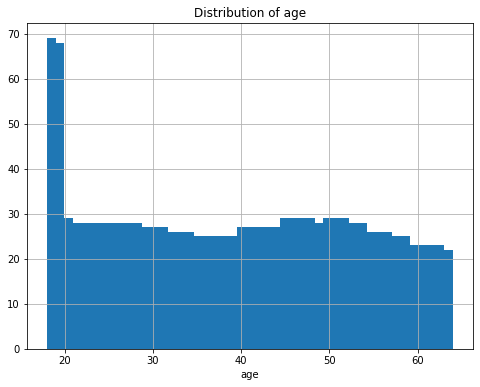

In [55]:
# Q1) What is the distribution of each of the data columns?
# Histogram: age
# -------------------------------------------------------------------------------------------------------------
# print(df.groupby('age').size())
df['age'].hist(bins=47,figsize=(8,6))
plt.xlabel('age')
plt.title('Distribution of age')
plt.show()
# -------------------------------------------------------------------------------------------------------------
# Age is distributed quite uniformly between 18 and 64 years.
# There is significant peak of young people below or around 20 years old.

sex
female    662
male      676
dtype: int64


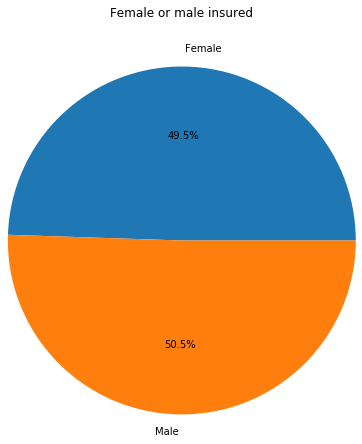

In [56]:
# Q1) What is the distribution of each of the data columns?
# Pie chart: sex
# -------------------------------------------------------------------------------------------------------------
size_by_sex = df.groupby('sex').size()
print(size_by_sex)
my_labels = 'Female','Male'
plt.pie(size_by_sex,labels = my_labels,autopct='%1.1f%%',radius=2)
plt.title('Female or male insured', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# There is no gender bias based on the M/F distribution in the sample.

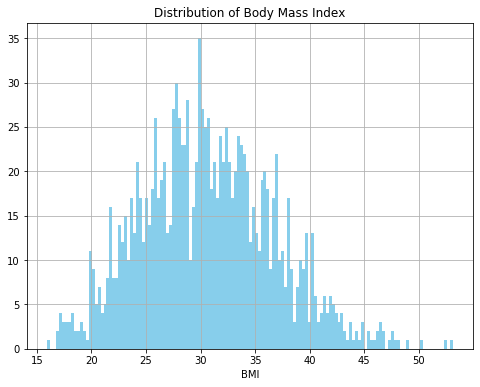

In [57]:
# Q1) What is the distribution of each of the data columns?
# Histogram: bmi
# -------------------------------------------------------------------------------------------------------------
# print(len(df.groupby('bmi').size()))
df['bmi'].hist(bins=137,color = "skyblue",figsize=(8,6))
plt.xlabel('BMI')
plt.title('Distribution of Body Mass Index')
plt.show()
# -------------------------------------------------------------------------------------------------------------
# BMI is normally distributed (visual inspection, can add gaussian curve to the plot to verify).

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64


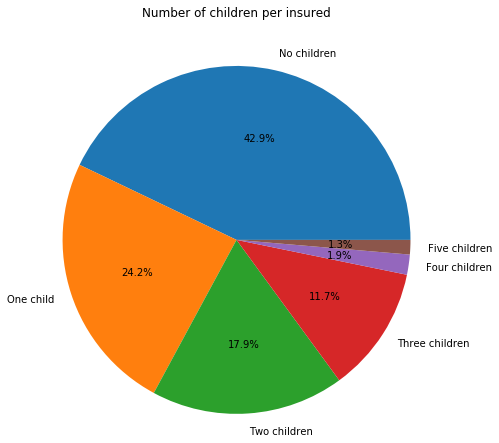

In [58]:
# Q1) What is the distribution of each of the data columns?
# Pie chart: children

# Q7) What is the minimum and maximum number of children?
# -------------------------------------------------------------------------------------------------------------
size_by_children = df.groupby('children').size()
print(size_by_children)
my_labels = 'No children','One child','Two children','Three children','Four children','Five children'
plt.pie(size_by_children,labels = my_labels,autopct='%1.1f%%',radius=2)
plt.title('Number of children per insured', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# 43.9% of the insured doesn't have any children. Most frequently they have one or two children (42.1%).

smoker
no     1064
yes     274
dtype: int64


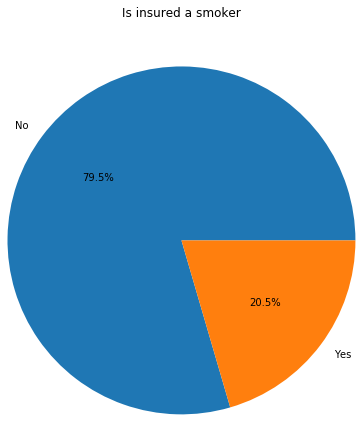

In [59]:
# Q1) What is the distribution of each of the data columns?
# Pie chart: smoker
# -------------------------------------------------------------------------------------------------------------
size_by_smoke = df.groupby('smoker').size()
print(size_by_smoke)
my_labels = 'No','Yes'
plt.pie(size_by_smoke,labels = my_labels,autopct='%1.1f%%',radius=2)
plt.title('Is insured a smoker', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# 20.5% of the insured are smokers.

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64


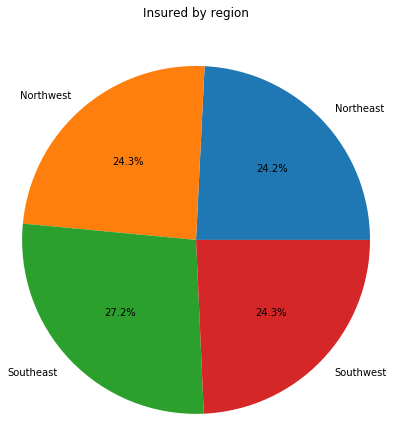

In [60]:
# Q1) What is the distribution of each of the data columns?
# Pie chart: region

# Q6) Which region is most populous in this dataset?  
# -------------------------------------------------------------------------------------------------------------
size_by_region = df.groupby('region').size()
print(size_by_region)
my_labels = 'Northeast','Northwest','Southeast','Southwest'
plt.pie(size_by_region,labels = my_labels,autopct='%1.1f%%',radius=2)
plt.title('Insured by region', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# There is nearly equal distribution of insured by region. No geographical bias expected.

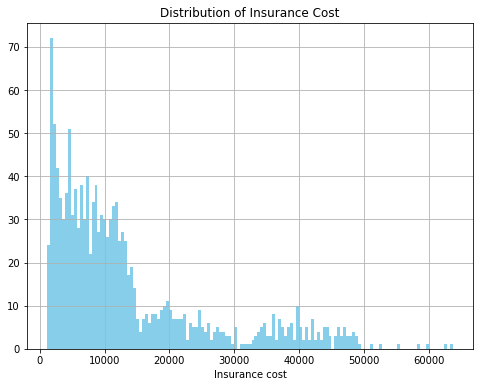

In [61]:
# Q1) What is the distribution of each of the data columns?
# Histogram: charges
# -------------------------------------------------------------------------------------------------------------
# print(len(df.groupby('bmi').size()))
df['charges'].hist(bins=137,color = "skyblue",figsize=(8,6))
plt.xlabel('Insurance cost')
plt.title('Distribution of Insurance Cost')
plt.show()
# -------------------------------------------------------------------------------------------------------------
# Most of the charges are no more of 20 000 U.S. $

## Part 2: Analysis of correlations

0
0-10k $        712
10k - 20k $    353
20k - 30k $    111
> 30k $        162
Name: 0, dtype: int64


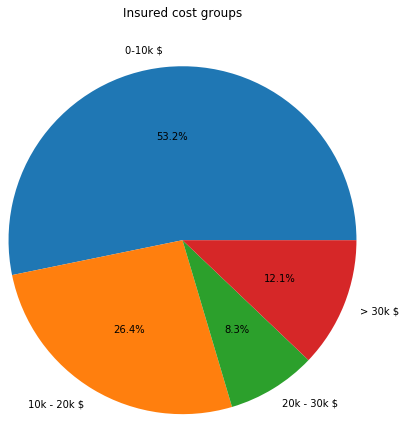

In [62]:
# What are the cost groups of the insured?
# -------------------------------------------------------------------------------------------------------------
cut_labels_cost_group = ['0-10k $','10k - 20k $','20k - 30k $','> 30k $']
cut_bins_cost_group = [0, 10000, 20000, 30000, 100000]
cost_groups = pd.cut(df['charges'], bins=cut_bins_cost_group, labels=cut_labels_cost_group)
cost_groups_size = cost_groups.to_frame(0).groupby(0)[0].size()
print(cost_groups_size)

plt.pie(cost_groups_size,labels = cut_labels_cost_group,autopct='%1.1f%%',radius=2)
plt.title('Insured cost groups', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# As shown above, most of the costs are lower than 20 000$.
# Pie chart below shows that this these costs are for nearly 80% of the insured.

0
0-25 yrs     306
26-40 yrs    395
41-60 yrs    546
60+ yrs       91
Name: 0, dtype: int64
           charges
age               
0-25 yrs    9087.0
26-40 yrs  11097.0
41-60 yrs  15889.0
60+ yrs    21063.0


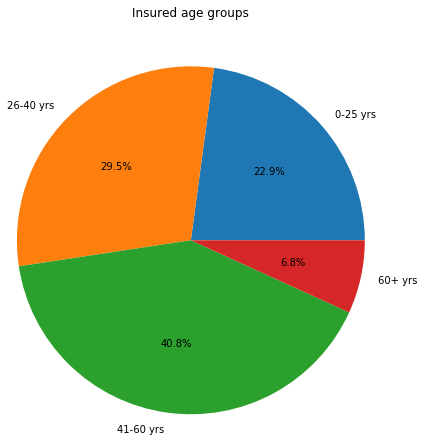

In [63]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# Age

# Q3) Which age group pays more charges on average? 
# -------------------------------------------------------------------------------------------------------------
cut_labels_age_group = ['0-25 yrs','26-40 yrs','41-60 yrs','60+ yrs']
cut_bins_age_group = [0, 25, 40, 60, 100]
age_groups = pd.cut(df['age'], bins=cut_bins_age_group, labels=cut_labels_age_group)
age_groups_size = age_groups.to_frame(0).groupby(0)[0].size()
print(age_groups_size)

df_age_charges = df[['age','charges']]
df_age_charges['age'] = pd.cut(df['age'], bins=cut_bins_age_group, labels=cut_labels_age_group)

print(df_age_charges.groupby('age').mean().round())

plt.pie(age_groups_size,labels = cut_labels_age_group,autopct='%1.1f%%',radius=2)
plt.title('Insured age groups', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# As the insured age, the costs of insurance are increasing, from on average 9k$ to 21k$

In [64]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# Sex
# -------------------------------------------------------------------------------------------------------------
mean_by_sex = df.groupby('sex').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_sex['charges'])
# -------------------------------------------------------------------------------------------------------------
# Average male pays ~1500$ more than average female.

sex
male      13956.75
female    12569.58
Name: charges, dtype: float64


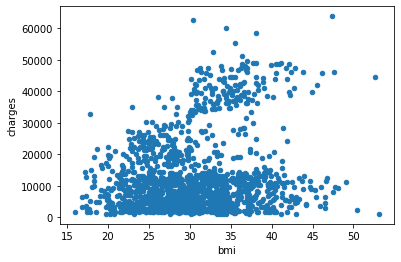

In [65]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# BMI
# -------------------------------------------------------------------------------------------------------------
df.plot('bmi','charges',kind='scatter')
plt.show()
# -------------------------------------------------------------------------------------------------------------
# Charges vs BMI => shows two "regions", one higher and more detached from the bulk of data.

0
Underweight     21
Normal         226
Overweight     386
Obese          705
Name: 0, dtype: int64
             charges
bmi                 
Underweight   8658.0
Normal       10435.0
Overweight   10998.0
Obese        15561.0


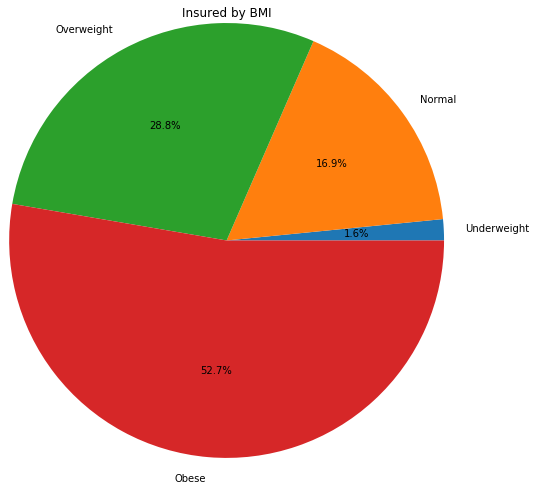

In [66]:
# What are the BMI groups of the insured?
# -------------------------------------------------------------------------------------------------------------
cut_labels_bmi_group = ['Underweight','Normal','Overweight','Obese']
cut_bins_bmi_group = [0, 18.5, 25, 30, 100]
bmi_groups = pd.cut(df['bmi'], bins=cut_bins_bmi_group, labels=cut_labels_bmi_group)
bmi_groups_size = bmi_groups.to_frame(0).groupby(0)[0].size()
print(bmi_groups_size)

df_bmi_charges = df[['bmi','charges']]
df_bmi_charges['bmi'] = pd.cut(df['bmi'], bins=cut_bins_bmi_group, labels=cut_labels_bmi_group)

print(df_bmi_charges.groupby('bmi').mean().round())





plt.pie(bmi_groups_size,labels = cut_labels_bmi_group,autopct='%1.1f%%',radius=2.5)
plt.title('Insured by BMI', y=1.5)
plt.show()
# -------------------------------------------------------------------------------------------------------------
# Only 16.9% of the insured has a healthy BMI.
# Shockingly, 52.7% of insured is obese.

In [67]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# Children 
# -------------------------------------------------------------------------------------------------------------
mean_by_children = df.groupby('children').mean().round().sort_values('charges',ascending = False)
print(mean_by_children['charges'])
# -------------------------------------------------------------------------------------------------------------
# Having 3 children is the most costly; having 5 is the least; but having no children can save ~400 - 3000$.

children
3    15355.0
2    15074.0
4    13851.0
1    12731.0
0    12366.0
5     8786.0
Name: charges, dtype: float64


In [68]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# Smoker 
# -------------------------------------------------------------------------------------------------------------
mean_by_smoker = df.groupby('smoker').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_smoker['charges'])
# -------------------------------------------------------------------------------------------------------------
# Smoking is very expensive: ~8k vs ~32k $. 

smoker
yes    32050.23
no      8434.27
Name: charges, dtype: float64


In [69]:
# Q2) How each of the 6 factors (age, sex, bmi, children, smoker, region) affects charges? 
# Region

# Q5) What is the average age in each of the regions? 

# -------------------------------------------------------------------------------------------------------------
mean_by_region = df.groupby('region').mean().round(2).sort_values('charges',ascending = False)
print(mean_by_region[['charges','age']])
# -------------------------------------------------------------------------------------------------------------
# Western part pays less than eastern part  (~1000-2000$).

            charges    age
region                    
southeast  14735.41  38.94
northeast  13406.38  39.27
northwest  12417.58  39.20
southwest  12346.94  39.46


In [70]:
# Q4) Is smoking correlated with bmi or age?
# -------------------------------------------------------------------------------------------------------------
df[['smoker','age','bmi']].groupby('smoker').mean().round()
# -------------------------------------------------------------------------------------------------------------
#

,age,bmi
smoker,,
no,39.0,31.0
yes,39.0,31.0


## Observations:  
- Age is distributed quite uniformly between 18 and 64 years.  
- There is significant peak of young people below or around 20 years old.
- There is no gender bias based on the M/F distribution in the sample.
- BMI is normally distributed.
- 43.9% of the insured doesn't have any children. Most frequently they have one or two children (42.1%).
- 20.5% of the insured are smokers.
- There is nearly equal distribution of insured by region. No geographical bias expected.
- Most of the charges are no more of 20 000 U.S. \$.
- Pie chart shows that this these costs are for nearly 80% of the insured.
- As the insured age, the costs of insurance are increasing, from average 9087 \\$ for the youngest to 21063 \\$ for the oldest.
- Average male pays 1 387.17\$ more than average female (13956.75 for male vs 12569.58 for female).   
- Only 16.9% of the insured has a healthy BMI.
- Shockingly, 52.7% of insured is obese.
- Obese people, who constiute majority of the insured pay 5126 \\$ than healthy people (10435 \\$ vs 15561 \\$).
- Having 3 children is the most costly; having 5 is the least; but having no children can save on average from 365 to 2989 \$.
- There is significant drop in insurance cost for people who have 5 kids, which breaks the correlation of "having more children increases insurance cost"(12366 \$ for no kids vs 8786 \\$ for 5 kids).
- Smoking is very expensive: 8434.27 \\$ for non-smokers vs 32050.23 \$ for smokers.
- Western part pays less than eastern part  (988.8 \$ - 2388.47 \\$).

## Part 3: Conclusions

The most impactful on the insurance cost is smoking. Having underlying medical record of each individuals could potentially help to predict the life expectancy which is expected to be the main factor of insurance cost.

Insurance cost is also increasing as the individuals age. Oldest age group will pay nearly the double of the youngest age group.

With the initial analysis, having more children increases the cost of insurance, however having more than four children drasticlly reduces the cost of insurance (lower than for individuals without kids). Having data about the insurance policy might explains some cost reductions for big families.

Only 16.9% of insured are within healthy BMI range. Over half of the group is obese. Being obese drives the cost of insurance significantly.

One interesting data that could be introduced into study could be the occupation of the insured - some of the jobs are of higher risk than the others. That could help to understand the differences of costs between males and females and/or between regions.